# Data Exploration

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_outlier import DfOutlier
from vis_seaborn import *

## Data reading

In [5]:
df = pd.read_csv("../data/processed_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146891 non-null  float64
 1   start                           146891 non-null  object 
 2   start_ms                        146891 non-null  float64
 3   end                             146891 non-null  object 
 4   end_ms                          146891 non-null  float64
 5   dur_(ms)                        146891 non-null  float64
 6   imsi                            146891 non-null  float64
 7   msisdn_number                   146891 non-null  float64
 8   imei                            146891 non-null  float64
 9   last_location_name              146891 non-null  object 
 10  avg_rtt_dl_(ms)                 146891 non-null  float64
 11  avg_rtt_ul_(ms)                 146891 non-null  float64
 12  avg_bearer_tp_dl

## Handling Outlier

first we need to select numeric columns

In [6]:
Id = ["bearer_id", 'msisdn_number', 'imei', 'imsi']
categorical_columns = ["last_location_name", "handset_manufacturer", "handset_type"]
columns_with_time = ['start', 'end']

In [7]:
nun_numeric = Id
nun_numeric.extend(categorical_columns)
nun_numeric.extend(columns_with_time)
nun_numeric


['bearer_id',
 'msisdn_number',
 'imei',
 'imsi',
 'last_location_name',
 'handset_manufacturer',
 'handset_type',
 'start',
 'end']

In [8]:
numeric_columns = [col if col not in nun_numeric else ' ' for col in df]
numeric_columns = list(filter(lambda a: a != ' ', numeric_columns))
numeric_columns

['start_ms',
 'end_ms',
 'dur_(ms)',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'social_media_dl_(bytes)',
 'social_media_ul_(bytes)',
 'google_dl_(bytes)',
 'google_ul_(bytes)',
 'email_dl_(bytes)',
 'email_ul_(bytes)',
 'youtube_dl_(bytes)',
 'youtube_ul_(bytes)',
 'netflix_dl_(bytes)',
 'netflix_ul_(bytes)',
 'gaming_dl_(bytes)',
 'gaming_ul_(bytes)',
 'other_dl_(bytes)',
 'other_ul_(bytes)',
 'total_ul_(bytes)',
 'total_dl_(bytes)']

In [9]:
numeric_df = df[numeric_columns].copy()

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.


In [10]:
df_outliers = DfOutlier(numeric_df)
overview = df_outliers.getOverview()
overview.sort_values(by=["number_of_outliers"], inplace=True)
overview


,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean
label,,,,,,,,,,
start_ms,250.0,147.0,749.0,499.0,0.000828,0,0.0%,114.0,182.0,146.89
other_ul_(bytes),4144489.0,1.0,12382039.5,8237550.5,0.001478,0,0.0%,1.0,3.0,1.00
other_dl_(bytes),210152719.0,1.0,631368280.5,421215561.5,0.001828,0,0.0%,1.0,2.0,1.00
gaming_ul_(bytes),4132622.0,1.0,12432390.5,8299768.5,-0.002558,0,0.0%,1.0,3.0,1.00
gaming_dl_(bytes),210394124.5,1.0,633330072.5,422935948.0,-0.003940,0,0.0%,1.0,2.0,1.00
netflix_ul_(bytes),5480202.0,1.0,16503522.5,11023320.5,-0.000281,0,0.0%,1.0,3.0,1.00
netflix_dl_(bytes),5776625.5,1.0,17470165.5,11693540.0,-0.002182,0,0.0%,1.0,3.0,1.00
youtube_ul_(bytes),5516549.0,1.0,16514112.0,10997563.0,-0.001242,0,0.0%,1.0,3.0,1.00
youtube_dl_(bytes),5833512.5,1.0,17440635.5,11607123.0,0.000105,0,0.0%,1.0,3.0,1.00


Outliers can have many causes, such as:

Measurement or input error.
Data corruption.
True outlier observation(e.g. Michael Jordan in basketball).


In [11]:
seleced_numeric_columns = [
    'dur_(ms)',
    'social_media_dl_(bytes)',
    'social_media_ul_(bytes)',
    'google_dl_(bytes)',
    'google_ul_(bytes)',
    'email_dl_(bytes)',
    'email_ul_(bytes)',
    'youtube_dl_(bytes)',
    'youtube_ul_(bytes)',
    'netflix_dl_(bytes)',
    'netflix_ul_(bytes)',
    'gaming_dl_(bytes)',
    'gaming_ul_(bytes)',
    'other_dl_(bytes)',
    'other_ul_(bytes)',
    'total_ul_(bytes)',
    'total_dl_(bytes)',
]

In [12]:
nun_numeric.extend(seleced_numeric_columns)
clean_df = df[nun_numeric].copy()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   bearer_id                146891 non-null  float64
 1   msisdn_number            146891 non-null  float64
 2   imei                     146891 non-null  float64
 3   imsi                     146891 non-null  float64
 4   last_location_name       146891 non-null  object 
 5   handset_manufacturer     146891 non-null  object 
 6   handset_type             146891 non-null  object 
 7   start                    146891 non-null  object 
 8   end                      146891 non-null  object 
 9   dur_(ms)                 146891 non-null  float64
 10  social_media_dl_(bytes)  146891 non-null  float64
 11  social_media_ul_(bytes)  146891 non-null  float64
 12  google_dl_(bytes)        146891 non-null  float64
 13  google_ul_(bytes)        146891 non-null  float64
 14  emai

In [13]:
df_outliers = DfOutlier(clean_df)
df_outliers.replace_outliers_with_iqr(['dur_(ms)'])
df_outliers.remove_outliers(seleced_numeric_columns)

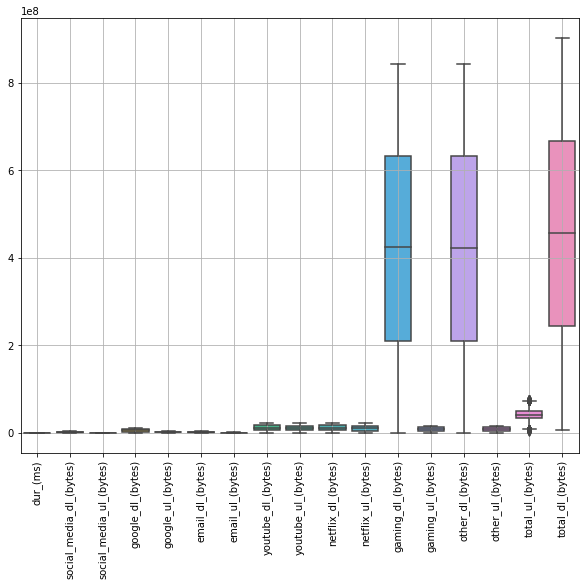

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data=clean_df[seleced_numeric_columns])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)


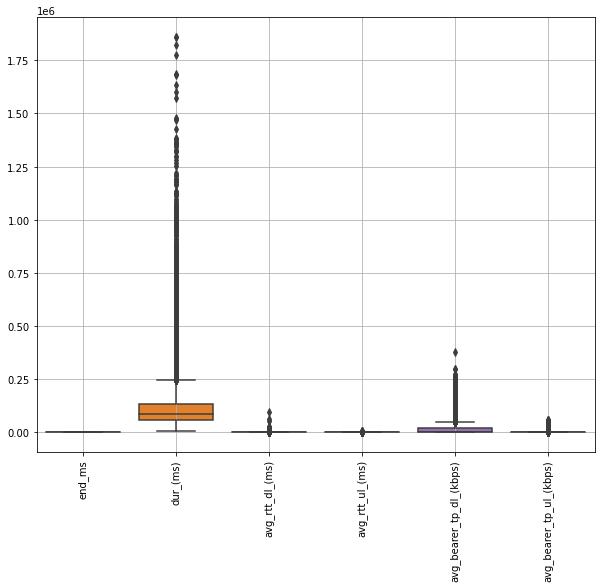

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data=df[['end_ms',
                          'dur_(ms)',
                          'avg_rtt_dl_(ms)',
                          'avg_rtt_ul_(ms)',
                          'avg_bearer_tp_dl_(kbps)',
                          'avg_bearer_tp_ul_(kbps)']])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)


In [ ]:
clean_df.to_csv('../data/clean_data.csv', index=False)